In [1]:
import keras
import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np

def read_and_decode(filename, reshape_dims):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, reshape_dims)

CLASS_NAMES = ['daisy','dandelion','roses','sunflowers','tulips']
print(f'Class Names: {CLASS_NAMES}')

def decode_csv(csv_row):
    record_defaults = ["path", "flower"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [224, 224, 3])
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    return img, label

# Helper functions
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric]);
        ax[idx].legend([metric, 'val_' + metric])

# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(model, filename):
    f, ax = plt.subplots(3, 5, figsize=(25,15))
    dataset = (tf.data.TextLineDataset(filename).map(decode_csv))
    for idx, (img, label) in enumerate(dataset.take(15)):        
        ax[idx//5, idx%5].imshow((img.numpy()));
        batch_image = tf.reshape(img, [1, 224, 224, 3])
        batch_pred = model.predict(batch_image)
        pred = batch_pred[0]
        label = CLASS_NAMES[label.numpy()]
        pred_label_index = tf.math.argmax(pred).numpy()
        pred_label = CLASS_NAMES[pred_label_index]
        prob = pred[pred_label_index]
        ax[idx//5, idx%5].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))
        ax[idx//5, idx%5].axis('off')

def show_trained_weights(model):
    # CLASS_NAMES is ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    LAYER = 1 # Layer 0 flattens the image, layer=1 is the first dense layer
    WEIGHT_TYPE = 0 # 0 for weight, 1 for bias
    
    f, ax = plt.subplots(1, 5, figsize=(15,15))
    
    for flower in range(len(CLASS_NAMES)):
        weights = model.layers[LAYER].get_weights()[WEIGHT_TYPE][:, flower]
        min_wt = tf.math.reduce_min(weights).numpy()
        max_wt = tf.math.reduce_max(weights).numpy()
        flower_name = CLASS_NAMES[flower]
        print("Scaling weights for {} in {} to {}".format(flower_name, min_wt, max_wt))
        weights = (weights - min_wt)/(max_wt - min_wt)
        ax[flower].imshow(weights.reshape(IMG_HEIGHT, IMG_WIDTH, 3));
        ax[flower].set_title(flower_name);
        ax[flower].axis('off')

Class Names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Found 8883 validated image filenames belonging to 104 classes.
Found 1866 validated image filenames belonging to 104 classes.


C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 145 invalid image filename(s) in x_col="File Path". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 32 invalid image filename(s) in x_col="File Path". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 104)            │       426,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,007,272 (83.95 MB)

 Trainable params: 22,007,272 (83.95 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20


C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


278/278 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.0520 - loss: 4.4218 - val_accuracy: 0.0627 - val_loss: 4.1450
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 121s 434ms/step - accuracy: 0.0506 - loss: 4.1944 - val_accuracy: 0.0589 - val_loss: 4.1417
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 123s 442ms/step - accuracy: 0.0594 - loss: 4.1721 - val_accuracy: 0.0627 - val_loss: 4.1390
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 124s 444ms/step - accuracy: 0.0613 - loss: 4.1538 - val_accuracy: 0.0627 - val_loss: 4.1389
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 123s 440ms/step - accuracy: 0.0570 - loss: 4.1767 - val_accuracy: 0.0563 - val_loss: 4.1388
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 123s 441ms/step - accuracy: 0.0628 - loss: 4.1441 - val_accuracy: 0.0627 - val_loss: 4.1384
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 120s 431ms/step - accuracy: 0.0600 - loss: 4.1699 - val_accuracy: 0.0589 - val_loss: 4.1369
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 120s 432ms/step - accuracy: 0.0553 - loss: 4.1696 

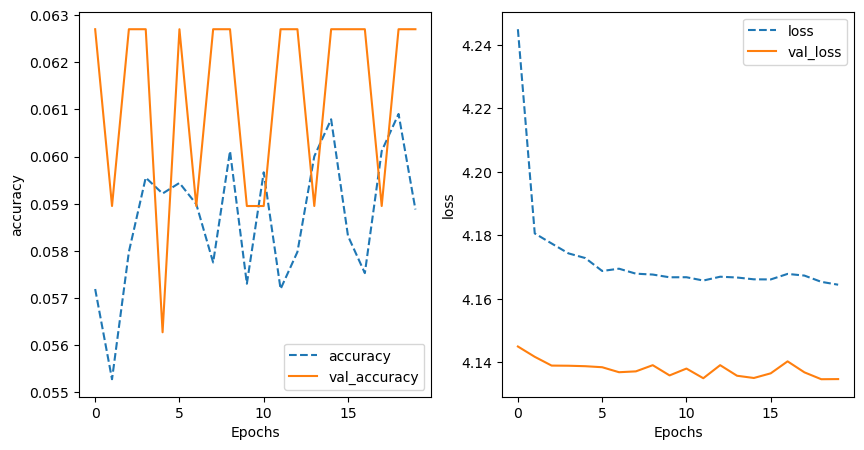

In [2]:
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the main folder containing the training and validation subfolders
train_folder_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/train"
val_folder_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/validation"
test_folder_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/test"

# Paths for the CSV files
train_csv_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/train/train.csv"
val_csv_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/validation/validation.csv"
test_folder_path = "F:/NCET/2023-24/2023-24 EVEN/Computer Vision with Machine Learning/Dataset/flower_104/jpeg-224x224/test/test.csv"
# Create CSV files for training and validation
def create_csv(folder_path, csv_path):
    data = []
    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if os.path.isdir(folder):
            for file_name in os.listdir(folder):
                file_path = os.path.join(folder, file_name)
                if os.path.isfile(file_path):
                    data.append({'File Name': file_name, 'File Path': file_path, 'Label': folder_name})
    df = pd.DataFrame(data)
    df.to_csv(csv_path, index=False)

# create_csv(train_folder_path, train_csv_path)
# create_csv(val_folder_path, val_csv_path)

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_df = pd.read_csv(train_csv_path)
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=None,
        x_col="File Path",
        y_col="Label",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
val_df = pd.read_csv(val_csv_path)
val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=None,
        x_col="File Path",
        y_col="Label",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# ALEXNET architecture
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(104, activation='softmax')  # 104 classes for flowers
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

training_plot(['accuracy','loss'], history)
